In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
%matplotlib inline

In [19]:
country_geo = r"C:\Users\ms207\Desktop\CF\6\Data\us-states.json"

In [20]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r"C:\Users\ms207\Desktop\CF\6\Data\us-states.json",)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [21]:
path = r"C:\Users\ms207\Desktop\CF\6"

In [22]:
df = pd.read_csv(os.path.join(path, 'Data', 'newupdated.csv'))

In [23]:
df.head()

,month_date_yyyymm,cbsa_code,City,State,alabama,alaska,arizona,arkansas,california,colorado,...,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,median_days_on_market,median_days_on_market_yy,median_dom_vs_us,median_listing_price,median_listing_price_vs_us
0,202204,24860,"greenville-anderson-mauldin, sc",south carolina,0,0,0,0,0,0,...,-21,85,45.986622,34.448161,57.525084,36,-0.339450,2,349500,0.8224
1,202204,36260,"ogden-clearfield, ut",utah,0,0,0,0,0,0,...,-30,-94,51.337793,86.287625,16.387960,21,1.333333,-13,569000,1.3388
2,202204,23060,"fort wayne, in",Indiana,0,0,0,0,0,0,...,2,28,85.785953,79.264214,92.307692,24,-0.351351,-10,270000,0.6353
3,202204,29100,"la crosse-onalaska, wi-mn",Wisconsin,0,0,0,0,0,0,...,-3,8,95.986622,93.979933,97.993311,16,-0.319149,-18,340000,0.8000
4,202204,31420,"macon, ga",Georgia,0,0,0,0,0,0,...,-63,-12,31.772575,41.137124,22.408027,34,-0.093333,0,209000,0.4918


In [24]:
df.columns

Index(['month_date_yyyymm', 'cbsa_code', 'City', 'State ', 'alabama', 'alaska',
       'arizona', 'arkansas', 'california', 'colorado', 'connecticut ',
       'deleware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois',
       'indiana', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnessotta', 'mississippi', 'missouri',
       'montana ', 'nebraska', 'nevada', 'new hampshire', 'new jersey',
       'new mexico', 'new york', 'north carolina ', 'north dakota', 'ohio ',
       'oklahoma', 'oregon', 'pennsylvania', 'south carolina', 'south dakota',
       'tennessee', 'texas', 'utah ', 'vermont', 'virginia', 'washington',
       'west virgina', 'wisconsin', 'nielsen_hh_rank', 'hotness_rank',
       'hotness_rank_mm', 'hotness_rank_yy', 'hotness_score', 'supply_score',
       'demand_score', 'median_days_on_market', 'median_days_on_market_yy',
       'median_dom_vs_us', 'median_listing_price',
       'median_listing_price_vs_us'],
      d

In [25]:
df.shape

(300, 63)

In [31]:
# Select only the necessary columns and put them in a list called columns

columns = ['alabama', 'alaska',
       'arizona', 'arkansas', 'california', 'colorado', 'connecticut ',
       'deleware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois',
       'indiana', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnessotta', 'mississippi', 'missouri',
       'montana ', 'nebraska', 'nevada', 'new hampshire', 'new jersey',
       'new mexico', 'new york', 'north carolina ', 'north dakota', 'ohio ',
       'oklahoma', 'oregon', 'pennsylvania', 'south carolina', 'south dakota',
       'tennessee', 'texas', 'utah ', 'vermont', 'virginia', 'washington',
       'west virgina', 'wisconsin', 'median_days_on_market', 'median_listing_price', 'hotness_rank', 'supply_score'] 

In [32]:
state = df[columns]

In [33]:
state.head()

,alabama,alaska,arizona,arkansas,california,colorado,connecticut,deleware,florida,georgia,...,utah,vermont,virginia,washington,west virgina,wisconsin,median_days_on_market,median_listing_price,hotness_rank,supply_score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,36,349500,166,34.448161
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,21,569000,133,86.287625
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,24,270000,19,79.264214
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,16,340000,6,93.979933
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,34,209000,233,41.137124


In [34]:
states_num = state[['alabama', 'alaska',
       'arizona', 'arkansas', 'california', 'colorado', 'connecticut ',
       'deleware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois',
       'indiana', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnessotta', 'mississippi', 'missouri',
       'montana ', 'nebraska', 'nevada', 'new hampshire', 'new jersey',
       'new mexico', 'new york', 'north carolina ', 'north dakota', 'ohio ',
       'oklahoma', 'oregon', 'pennsylvania', 'south carolina', 'south dakota',
       'tennessee', 'texas', 'utah ', 'vermont', 'virginia', 'washington',
       'west virgina', 'wisconsin']]

In [35]:
s2 = states_num.idxmax(axis=1)

In [36]:
s2

0      south carolina
1               utah 
2             indiana
3           wisconsin
4             georgia
            ...      
295          michigan
296           georgia
297            hawaii
298             texas
299          new york
Length: 300, dtype: object

In [38]:
state['STATE_NAME'] = s2

<ipython-input-38-42ae824f8f78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state['STATE_NAME'] = s2


In [39]:
state.columns

Index(['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado',
       'connecticut ', 'deleware', 'florida', 'georgia', 'hawaii', 'idaho',
       'illinois', 'indiana', 'kansas', 'kentucky', 'louisiana', 'maine',
       'maryland', 'massachusetts', 'michigan', 'minnessotta', 'mississippi',
       'missouri', 'montana ', 'nebraska', 'nevada', 'new hampshire',
       'new jersey', 'new mexico', 'new york', 'north carolina ',
       'north dakota', 'ohio ', 'oklahoma', 'oregon', 'pennsylvania',
       'south carolina', 'south dakota', 'tennessee', 'texas', 'utah ',
       'vermont', 'virginia', 'washington', 'west virgina', 'wisconsin',
       'median_days_on_market', 'median_listing_price', 'hotness_rank',
       'supply_score', 'STATE_NAME'],
      dtype='object')

In [43]:
state.drop(columns = ['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado',
       'connecticut ', 'deleware', 'florida', 'georgia', 'hawaii', 'idaho',
       'illinois', 'indiana', 'kansas', 'kentucky', 'louisiana', 'maine',
       'maryland', 'massachusetts', 'michigan', 'minnessotta', 'mississippi',
       'missouri', 'montana ', 'nebraska', 'nevada', 'new hampshire',
       'new jersey', 'new mexico', 'new york', 'north carolina ',
       'north dakota', 'ohio ', 'oklahoma', 'oregon', 'pennsylvania',
       'south carolina', 'south dakota', 'tennessee', 'texas', 'utah ',
       'vermont', 'virginia', 'washington', 'west virgina', 'wisconsin'], inplace = True)

D:\ana\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
state.head()

,median_days_on_market,median_listing_price,hotness_rank,supply_score,STATE_NAME
0,36,349500,166,34.448161,south carolina
1,21,569000,133,86.287625,utah
2,24,270000,19,79.264214,indiana
3,16,340000,6,93.979933,wisconsin
4,34,209000,233,41.137124,georgia


In [47]:
type(state)

pandas.core.frame.DataFrame

In [48]:
state['STATE_NAME'] = state['STATE_NAME'].str.title()

<ipython-input-48-df419e5f43ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state['STATE_NAME'] = state['STATE_NAME'].str.title()


In [50]:
state.head()

,median_days_on_market,median_listing_price,hotness_rank,supply_score,STATE_NAME
0,36,349500,166,34.448161,South Carolina
1,21,569000,133,86.287625,Utah
2,24,270000,19,79.264214,Indiana
3,16,340000,6,93.979933,Wisconsin
4,34,209000,233,41.137124,Georgia


In [51]:
state.isnull().sum()

median_days_on_market    0
median_listing_price     0
hotness_rank             0
supply_score             0
STATE_NAME               0
dtype: int64

In [53]:
dups = state.duplicated()

In [54]:
dups.shape # no dups

(300,)

<AxesSubplot:xlabel='median_days_on_market', ylabel='Count'>

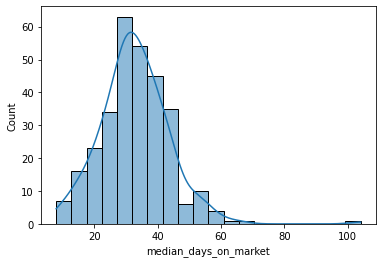

In [55]:
sns.histplot(state['median_days_on_market'], bins=20, kde = True)

In [58]:
state[state['median_days_on_market'] >250]

,median_days_on_market,median_listing_price,hotness_rank,supply_score,STATE_NAME


In [59]:
state.shape

(300, 5)

In [61]:
data_to_plot = state[['STATE_NAME','median_listing_price']]
data_to_plot.head()

,STATE_NAME,median_listing_price
0,South Carolina,349500
1,Utah,569000
2,Indiana,270000
3,Wisconsin,340000
4,Georgia,209000


In [63]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['STATE_NAME', 'median_listing_price'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [64]:
map.save('plot_data.html')

The analysis shows the median list prices in each state and leads me to understand what areas need to be targeted. 

I want to add DOM as an indicator for a slowing market. 